***
# Assignment 1 Social Graphs 2023

**Link to assignment description:** https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/assignments/Assignment1.ipynb
***

## Table of Contents
* [0. Requirements](#binning)
* [1. Binning degree distributions](#watts)
* [2. Random networks and plotting in `networkx`](#randomnetworks)
* [3. Watts-Strogatz Networks](#watts)
* [4. The Barabasi-Albert Model](#barabasi)
* [5. Power-laws and the friendship paradox](#powerlaws)
* [6. Configuration-model networks](#configuration)
* [7. Contributions](#contributions)
* [8. References](#references)

## 0. Requirements <a class="anchor" id="requirements"></a>

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

## 1. Binning degree distributions <a class="anchor" id="binning"></a>


Generating 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$:

In [12]:
data = np.random.normal(2, 0.125, 5000)

Binning the data:

In [13]:
counts, bins = np.histogram(data, 10)

The function `numpy.histogram` returns two arrays. The first array contains the number of data points in each bin, while the second array provides the edges of the bins.

The two arrays do not have the same length. This is because the first array contains a value for each bin, whereas the second array lists both the starting and ending values for each bin—representing the edges.

Plotting the binned data:

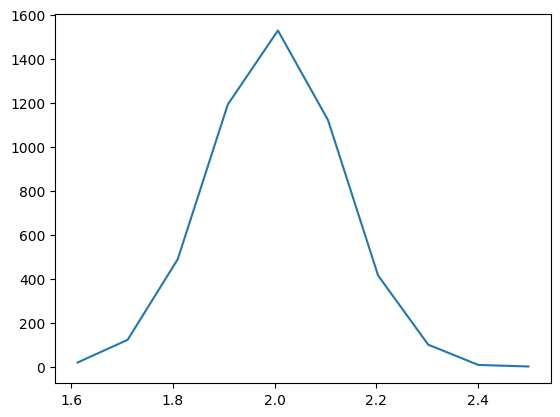

In [14]:
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.plot(bin_centers, counts)
plt.show()

The `bin_centers` list contains the center of each bin. This is calculated by first adding the starting and ending edges of each bin, represented by `bins[:-1]` and `bins[1:]` respectively, and then dividing the sum by two.

---

Generating 5000 datapoints from a Poisson distribution with $\lambda = 10$:

In [15]:
data = np.random.poisson(10, 5000)
data_min, data_max = data.min(), data.max()
data_min, data_max

(0, 25)

Creating the vector `v`:

In [16]:
v = np.arange(data_min, data_max + 1)
counts, bins = np.histogram(data, v)

The sum of the bin counts is 5000, that is the total number of binned data points.

The first element of `v` represents the starting edge of the first bin, i.e., the minimum data point value. The last element of `v` denotes the ending edge of the last bin, i.e., the maximum data point value.

Plotting the binned data:

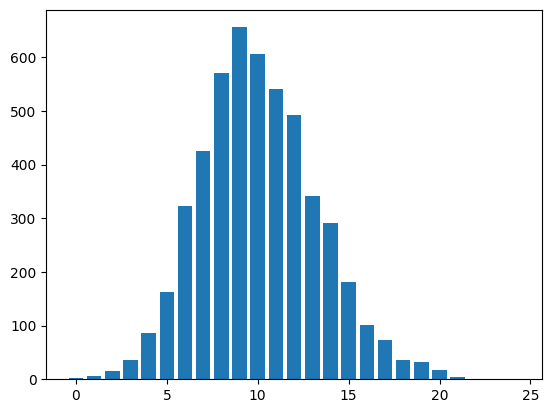

In [17]:
plt.bar(bins[:-1], counts)
plt.show()

---

Finding p for the ER network:

In [18]:
N = 5000
k = 10
p = k / (N-1) # k = p(N-1)

Generating the ER network graph:

In [19]:
G = nx.erdos_renyi_graph(N, p)

Binning the data:

In [20]:
degrees = [degree for node, degree in G.degree()]
counts = np.bincount(degrees)

Plotting the binned data:

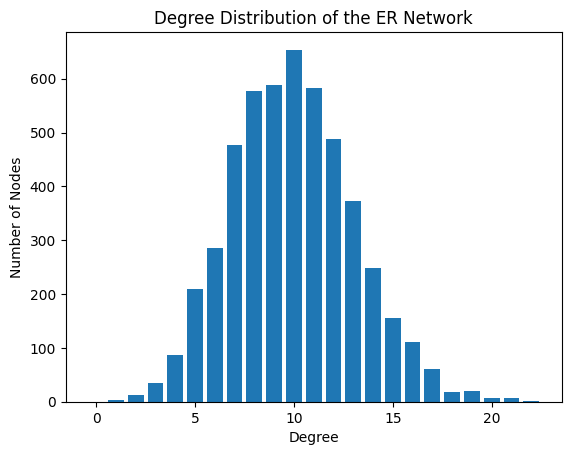

In [21]:
plt.bar(range(len(counts)), counts)
plt.title("Degree Distribution of the ER Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

># 2. Random networks and plotting in `networkx` <a class="anchor" id="randomnetworks"></a>

>DIANA

## 3. Watts-Strogatz Networks <a class="anchor" id="watts"></a>


In [26]:
# graph parameters
N = 500 
k = 4
p_values = [0., 0.1, 1.]

# list to store avg shortest path lengths
avg_shortest_paths = []

for p in p_values:
    G = nx.watts_strogatz_graph(N, k, p)
    avg_d = nx.average_shortest_path_length(G)
    avg_shortest_paths.append(avg_d)

for p, d in zip(p_values, avg_shortest_paths):
    print(f"For p = {p}, the average shortest path length <d> is {d:.4f}")

For p = 0.0, the average shortest path length <d> is 62.8758
For p = 0.1, the average shortest path length <d> is 8.0889
For p = 1.0, the average shortest path length <d> is 4.7806


When $p=1$ the network becomes a random network, i.e. all edges are rewired randomly. This will lead to the small-world phenomenon (low average shorterst path lengths).

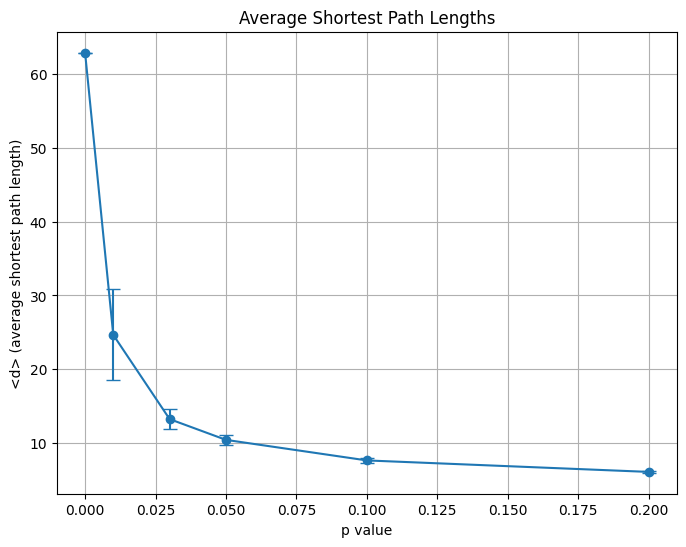

In [30]:
p_values = [0., 0.01, 0.03, 0.05, 0.1, 0.2]
avg_d_values = []
std_values = []

# exploring the WS model with different p_values
for p in p_values:
    path_lengths = []
    # generating and finding avg shortest path length in 50 WS networks
    for _ in range(50):
        G = nx.watts_strogatz_graph(N, k, p)
        avg_d = nx.average_shortest_path_length(G)
        path_lengths.append(avg_d)
    
    avg_d_values.append(np.mean(path_lengths))
    std_values.append(np.std(path_lengths))

# Plotting
plt.figure(figsize=(8,6))
plt.errorbar(p_values, avg_d_values, yerr=std_values, marker='o', capsize=5)
plt.title('Average Shortest Path Lengths')
plt.xlabel('p value')
plt.ylabel('<d> (average shortest path length)')
plt.grid(True)
plt.show()

In the plot we see the standard deviations of the average shortest path length for different values of p. We see that the average shortest path length (and thus standard deviation) decreases rapidly for each small increase in p. This further illustrates the small world property of the WS model.

## 4. The Barabasi-Albert Model <a class="anchor" id="barabasi"></a>

Generating a 100 node BA network graph:

In [ ]:
def BA_graph(n):
    G = nx.Graph()
    G.add_edge(0, 1)

    for i in range(2, n):
        nodes = []
        
        for edge in G.edges():
            for node in edge:
                nodes.append(node)

        random_node = random.choice(nodes)
        G.add_edge(i, random_node)

    return G

In [ ]:
G = BA_graph(100)

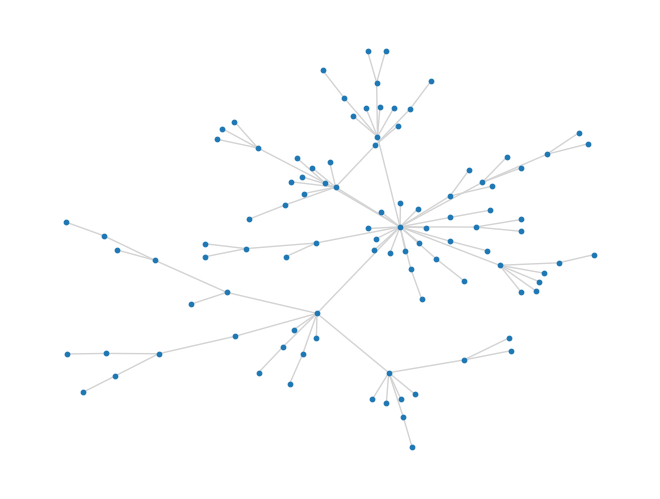

In [ ]:
nx.draw(G, with_labels=False, edge_color='lightgrey', node_size=10)
plt.show()

---

Generating a 5000 node BA network graph:

In [ ]:
G = BA_graph(5000)

In [ ]:
degrees = [degree for node, degree in G.degree()]
degrees_min, degrees_max = min(degrees), max(degrees)
degrees_min, degrees_max

(1, 120)

Binning the data:

In [ ]:
degrees, counts = np.unique(degrees, return_counts=True)

Plotting the binned data:

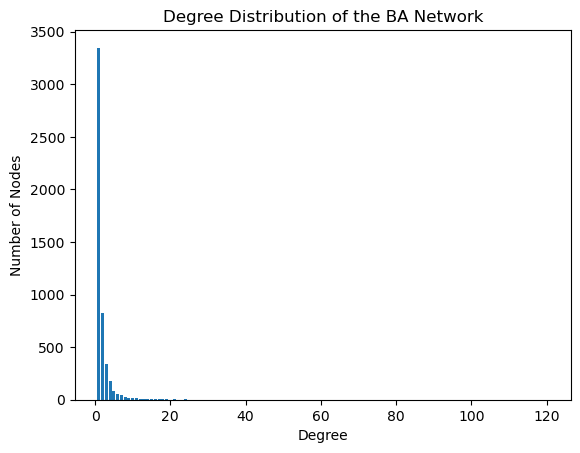

In [ ]:
plt.bar(degrees, counts)
plt.title("Degree Distribution of the BA Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

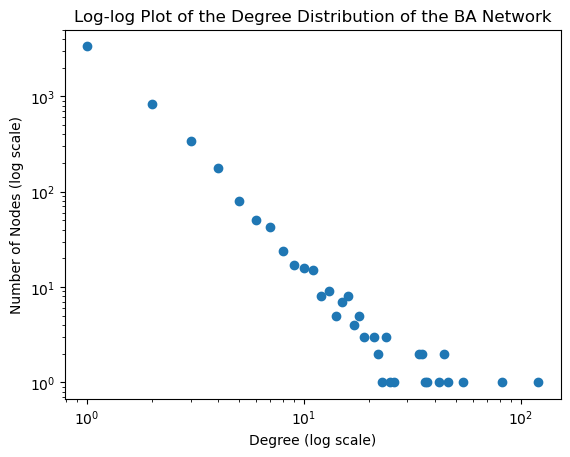

In [ ]:
plt.loglog(degrees, counts, 'o')
plt.title("Log-log Plot of the Degree Distribution of the BA Network")
plt.xlabel('Degree (log scale)')
plt.ylabel('Number of Nodes (log scale)')
plt.show()

> ## 5. Power-laws and the friendship paradox <a class="anchor" id="powerlaws"></a>

>DIANA

## 6. Configuration-model networks <a class="anchor" id="configuration"></a>

In [34]:
# Extract the degree sequence from the G graph
degree_sequence_BA = [degree for node, degree in G.degree()]
degree_sequence_BA

[4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 6,
 6,
 5,
 6,
 4,
 4,
 4,
 3,
 5,
 2,
 3,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 2,
 5,
 5,
 4,
 5,
 4,
 5,
 3,
 4,
 3,
 4,
 4,
 5,
 4,
 3,
 6,
 6,
 4,
 4,
 3,
 3,
 3,
 6,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 5,
 4,
 4,
 4,
 4,
 2,
 5,
 3,
 4,
 4,
 4,
 6,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 6,
 3,
 4,
 2,
 5,
 2,
 4,
 4,
 5,
 4,
 5,
 4,
 6,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 4,
 3,
 4,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 3,
 4,
 5,
 5,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 5,
 6,
 3,
 4,
 4,
 4,
 5,
 5,
 3,
 6,
 6,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 6,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 6,
 5,
 3,
 3,
 2,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 2,
 4,
 3,
 3,
 3,
 6,
 4,


In [36]:
# create configuration-model with function from week 3
def configuration_model(degrees):
    
    halfedges = []  # a list of halfedges
    
    for i, k in enumerate(degrees):
        halfedges.extend([i] * k)

    np.random.shuffle(halfedges)
    
    edgelist = []
    for i in range(0, len(halfedges), 2):
        edgelist.append((halfedges[i], halfedges[i+1]))
    
    return edgelist

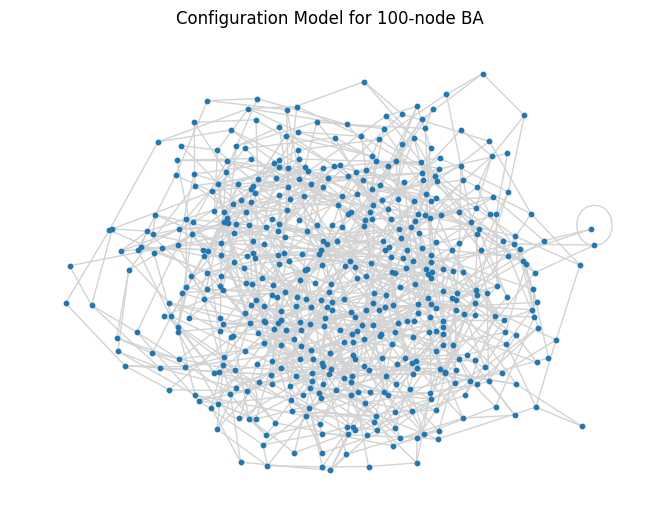

In [46]:
# use the function to create a configuration- model
# for the 100 node BA degree sequence
edgelist_100BA = configuration_model(degree_sequence_BA)
G_config = nx.Graph(edgelist_100BA)
nx.draw(G_config, with_labels=False, edge_color='lightgreY', node_size=10)
plt.title("Configuration Model for 100-node BA")
plt.show()

We notice that compared to the BA network, the configuration model network looks more random. This is explained by the preferential attachment of the BA network that leads to hubs. The configuration model just uses the degree sequence without the preferential attachment. 

In [47]:
# creating 5000 node configuration-model network
# half of the nodes have degree 3 and the other half have degree 5
degrees_5000 = [3] * 2500 + [5] * 2500
edgelist_5000 = configuration_model(degrees_5000)
G_config_5000 = nx.Graph(edgelist_5000)

In [58]:
sum_of_degrees = (3 * 2500) + (5 * 2500)
print(f"expected sum of degrees is: {sum_of_degrees}")

expected sum of degrees is: 20000


In [49]:
actual_degrees = [degree for node, degree in G_config_5000.degree()]
actual_sum_of_degrees = sum(actual_degrees)
print(f"The actual sum of degrees is: {actual_sum_of_degrees}")

The actual sum of degrees is: 19998


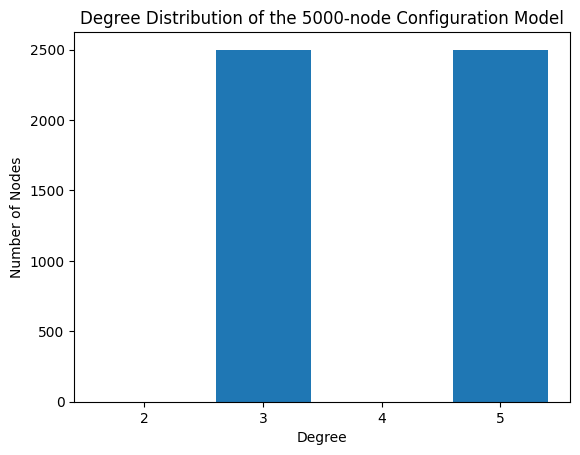

In [57]:
degrees, counts = np.unique(actual_degrees, return_counts=True)
plt.bar(degrees, counts, )
plt.title("Degree Distribution of the 5000-node Configuration Model")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
plt.show()

## 7. Contributions. Who did what? <a class="anchor" id="contributions"></a>

**222798 - Laura**
- Clustering
- Data Preprocessing and EDA
- Correlation Matrix
- Writing motivation, genre & Discussion

**223724 - Julia**
- Created stacked barchart per city. 
- Created US geographical heatmap
- Found relevant research for references


**s223730 - Pierre**
- Found dataset, preprocessed data and performed EDA
- Formatted notebook and made website
- Made yearly Air Quality heatmap plot
- Data analysis
    - clustering based on transportation methods
    - found optimal number of clusters
    - eda based on each 3 clusters
    - made stacked bar chart based on clusters.
    - OLS based on clusters and comments for OLS results
- Helped writing discussion (limitations, successes)


## 8. References <a class="anchor" id="references"></a>

[1] Longhurst, J. W. S., D. Rayfield, and D. E. Conlan. 1994. "The Impacts Of Road Transport On Urban Air Quality-A Case Study Of The Greater Manchester Region." WIT Transactions on Ecology and the Environment 3.

[2] Jing, Qin-Lei, Han-Zhen Liu, Wei-Qing Yu, and Xu He. 2022. "The Impact of Public Transportation on Carbon Emissions—From the Perspective of Energy Consumption" Sustainability 14, no. 10: 6248. https://doi.org/10.3390/su14106248 

[3] Edward Segel and Jeffrey Heer. 2011 ."Narrative Visualization: Telling Stories with Data". IEEE transactions on visualization and computer graphics. 16. 1139-48. 